In [ ]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

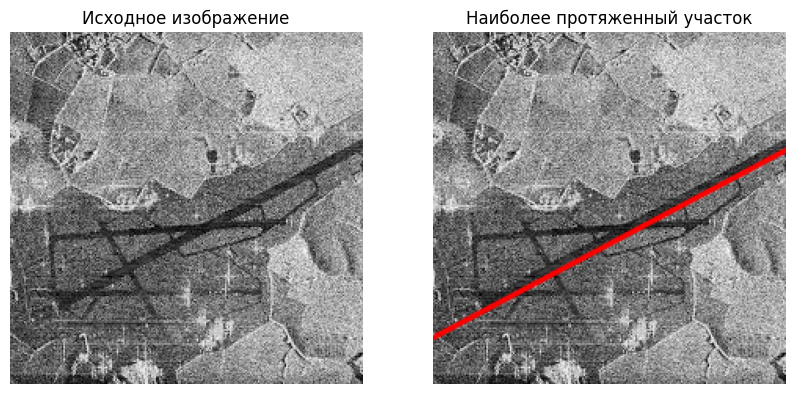

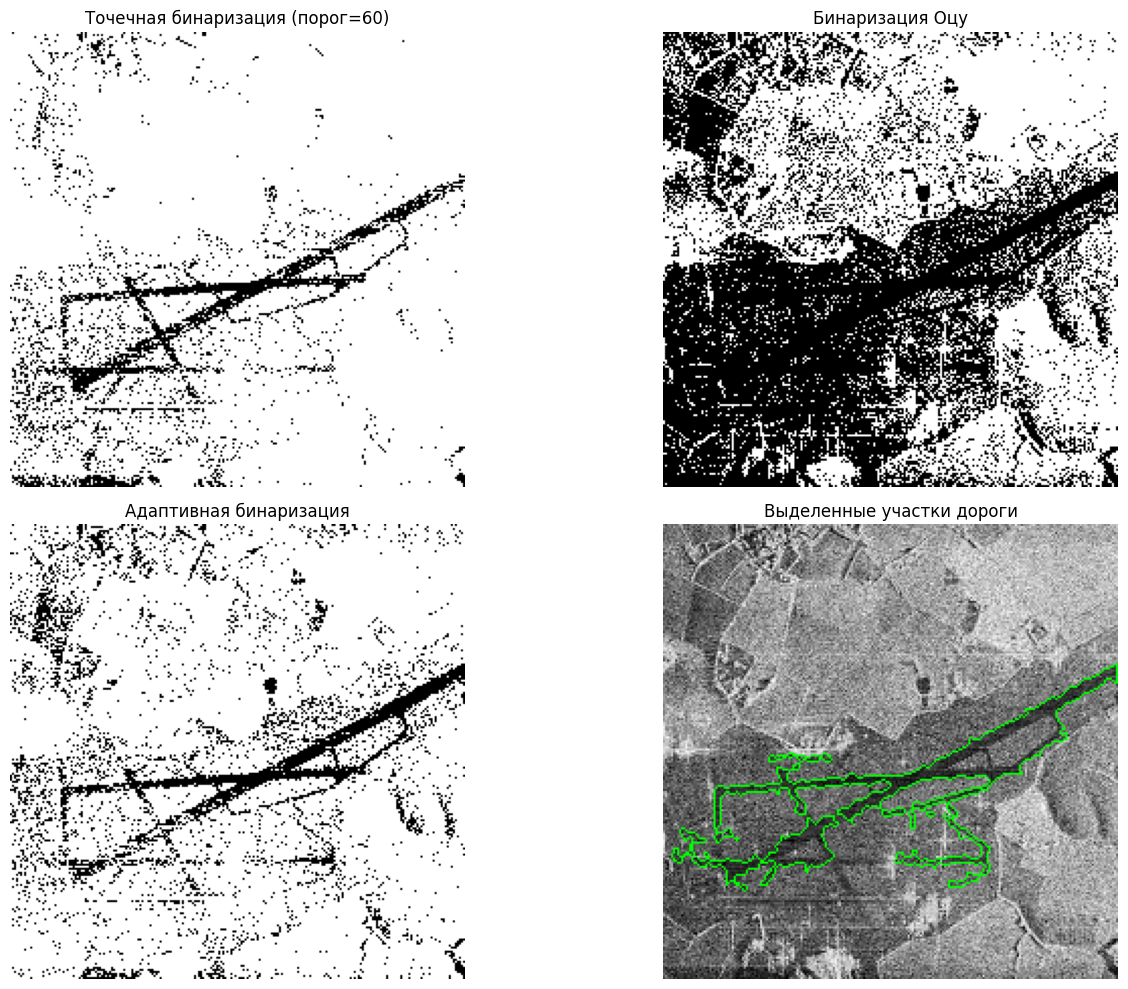

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'sar_3.jpg'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(image_gray, 100, 150, apertureSize=3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 135)

max_length = 0
longest_line = None

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        length = np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

if longest_line is not None:
    image_with_line = image.copy()
    cv2.line(image_with_line, longest_line[0], longest_line[1], (0, 0, 255), 2, cv2.LINE_AA)  # Уменьшили толщину до 2
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title('Наиболее протяженный участок')
plt.axis('off')
plt.show()

_, binary_threshold = cv2.threshold(image_gray, 60, 255, cv2.THRESH_BINARY)
_, binary_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_binary = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 45)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_threshold, cmap='gray')
plt.title('Точечная бинаризация (порог=60)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Бинаризация Оцу')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(adaptive_binary, cmap='gray')
plt.title('Адаптивная бинаризация')
plt.axis('off')

blurred = cv2.GaussianBlur(adaptive_binary, (7, 7), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

lane_image = image.copy()
if contours:
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:
            cv2.drawContours(lane_image, [contour], -1, (0, 255, 0), 1)  

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.title('Выделенные участки дороги')
plt.axis('off')

plt.tight_layout()
plt.show()